In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
label_txt_file = open('/Users/minguinho/Documents/AI_Datasets/Summer_ conference_CUAI/coco2017_label.txt', 'r')

label_list = []

for text in label_txt_file :
    label_list.append(text.strip('\n'))# \n 제거하고 추가

# 라벨의 인덱스가 1부터 시작 => 인덱스 번호를 줄 때 1을 빼야함

In [3]:
model = hub.KerasLayer("https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1") # 오래 걸림

In [4]:
image = cv2.imread("/Users/minguinho/Documents/AI_Datasets/Summer_ conference_CUAI/IMG_0952.JPG")

height, width,_ = image.shape

image_shape = [width, height]

output = model(np.expand_dims(image, 0))

score_output = output["detection_scores"]
class_output = output["detection_classes"]
box_output = output["detection_boxes"]

In [5]:
score_output_np = score_output[0].numpy()
class_output_np = class_output[0].numpy()
box_output_np = box_output[0].numpy()

count = 0

box_list = []
class_inImage_list = []

for num in score_output_np :
    print(num)
    if num > 0.5 :
        box_list.append(box_output_np[count])
        class_idx = class_output_np[count]
        class_inImage_list.append(label_list[int(class_idx)-1])
        count = count + 1
    else :
        break

0.99984765
0.99623305
0.5193775
0.34814522


In [6]:
count = 0

for box in box_list :
    ori_box = [int(image_shape[0] * box[1]), int(image_shape[1] * box[0]), int(image_shape[0] * box[3]), int(image_shape[1] * box[2])] # [ymin, xmin, ymax, xmax]라 x, y 순으로 바꿔준다. 
    image = cv2.putText(image,class_inImage_list[count],(ori_box[0], ori_box[1]-5),cv2.FONT_HERSHEY_SIMPLEX,3,(255,0,0), 10)
    image = cv2.rectangle(image, (ori_box[0], ori_box[1]), (ori_box[2], ori_box[3]), (0, 255, 0), 10)
    count = count + 1

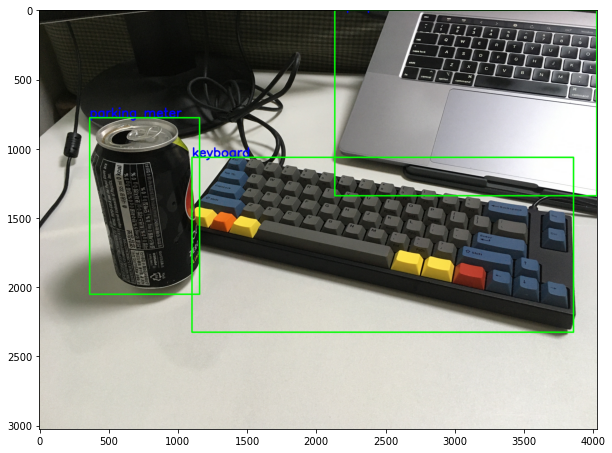

In [7]:
cv2.imwrite("/Users/minguinho/Documents/AI_Datasets/Summer_ conference_CUAI/test.JPG", image)
plt.figure(figsize=(10, 10))
img = plt.imread("/Users/minguinho/Documents/AI_Datasets/Summer_ conference_CUAI/test.JPG")
plt.imshow(img)